In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
db=sns.load_dataset('titanic')

In [ ]:
db
# db.head()
# db.info()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
X = db[['pclass', 'age', 'parch', 'sex', 'embarked', 'class', 'deck', 'embark_town']]
y = db['survived']

In [ ]:
X

,pclass,age,parch,sex,embarked,class,deck,embark_town
0,3,22.0,0,male,S,Third,NaN,Southampton
1,1,38.0,0,female,C,First,C,Cherbourg
2,3,26.0,0,female,S,Third,NaN,Southampton
3,1,35.0,0,female,S,First,C,Southampton
4,3,35.0,0,male,S,Third,NaN,Southampton
...,...,...,...,...,...,...,...,...
886,2,27.0,0,male,S,Second,NaN,Southampton
887,1,19.0,0,female,S,First,B,Southampton
888,3,NaN,2,female,S,Third,NaN,Southampton
889,1,26.0,0,male,C,First,C,Cherbourg


In [ ]:
print(X['age'])


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X['age'] = imputer.fit_transform(X[['age']])

<ipython-input-6-544bf06a3795>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = imputer.fit_transform(X[['age']])


In [ ]:
X['deck'] = X['deck'].cat.add_categories('Unknown').fillna('Unknown')
X['embark_town'] = X['embark_town'].fillna('Unknown')

<ipython-input-7-9bce48f77928>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['deck'] = X['deck'].cat.add_categories('Unknown').fillna('Unknown')
<ipython-input-7-9bce48f77928>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['embark_town'] = X['embark_town'].fillna('Unknown')


In [ ]:
from sklearn.compose import ColumnTransformer # to transfrom the column
from sklearn.preprocessing import OneHotEncoder  #  OneHotEncoder use to convert the char to binary
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),  list(range(3,8)))], remainder = 'passthrough') # using the passthrough another column will not change
x = np.array(ct.fit_transform(X))


In [ ]:
for column in X.columns:
    print(f"\n--- {column} ---")
    print(X[column])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test

array([[-0.7243102 ,  0.7243102 ,  2.16702561, ...,  0.81303367,
         0.01239022,  0.78470001],
       [-0.7243102 ,  0.7243102 , -0.46146201, ..., -0.40055118,
         0.11257046, -0.47934164],
       [-0.7243102 ,  0.7243102 , -0.46146201, ...,  0.81303367,
        -0.73453348, -0.47934164],
       ...,
       [ 1.38062393, -1.38062393, -0.46146201, ...,  0.81303367,
         0.6516366 ,  5.8408666 ],
       [ 1.38062393, -1.38062393, -0.46146201, ..., -0.40055118,
        -0.96556183, -0.47934164],
       [ 1.38062393, -1.38062393, -0.46146201, ...,  0.81303367,
        -1.96668467,  0.78470001]])

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ac=accuracy_score(y_test, y_pred)
print(ac)

[[89 16]
 [19 55]]
0.8044692737430168


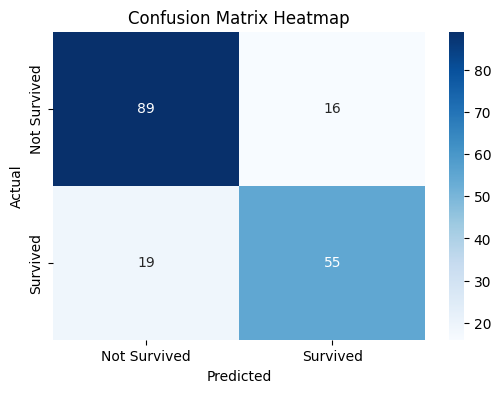

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


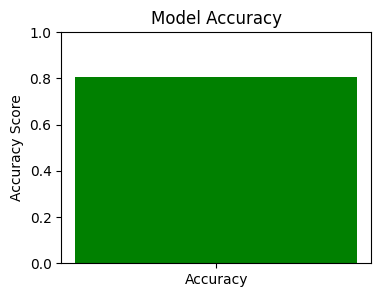

In [ ]:
# Bar plot for accuracy
plt.figure(figsize=(4, 3))
plt.bar(['Accuracy'], [ac], color='green')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.show()


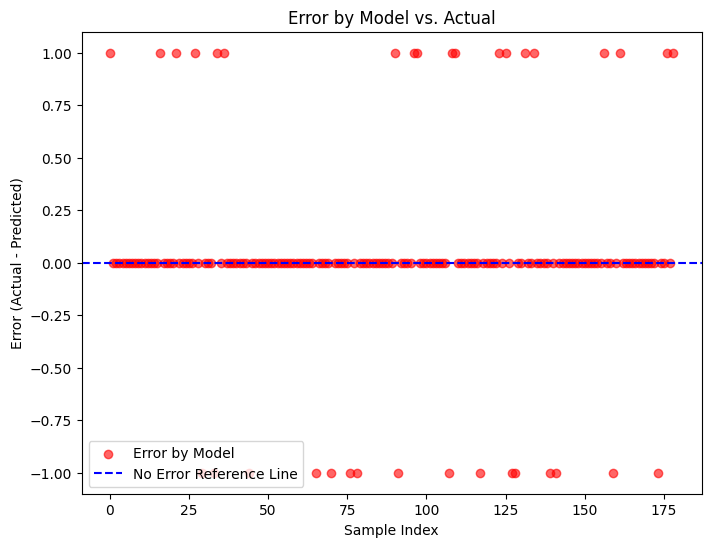

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute errors
errors = y_test - y_pred

# Plot the error
plt.figure(figsize=(8, 6))
plt.scatter(range(len(errors)), errors, color='red', alpha=0.6, label='Error by Model')
plt.axhline(y=0, color='blue', linestyle='--', label='No Error Reference Line')

# Add labels and legend
plt.title('Error by Model vs. Actual')
plt.xlabel('Sample Index')
plt.ylabel('Error (Actual - Predicted)')
plt.legend()
plt.show()
